Using this notebook to test out the pipeline centrally

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import energy

In [2]:
# Generating seed distribution
# This is the first step of the monte carlo method.

# We choose a lattice of 10*10 spins. 
N = 10
lattice = 2*np.random.randint(0,2,(N,N)) - 1
print(lattice)

T = 250 # In kelvin # Transition temp should be 1.64e23, kT/J ~ 2.26 (for actual value of k, putting k = 1 and J = 1)
k = 1/100#1.38e-23

[[ 1 -1  1  1  1 -1  1  1  1  1]
 [-1 -1 -1  1  1 -1 -1 -1  1  1]
 [-1  1 -1  1 -1  1  1  1  1  1]
 [ 1 -1  1 -1  1  1 -1 -1  1 -1]
 [ 1  1  1  1  1 -1  1  1 -1  1]
 [-1  1 -1 -1 -1  1 -1 -1  1 -1]
 [ 1  1 -1 -1  1 -1  1  1  1  1]
 [-1  1  1 -1  1  1 -1  1 -1 -1]
 [ 1  1  1 -1 -1  1 -1  1  1  1]
 [ 1  1  1  1  1  1 -1 -1  1 -1]]


In [3]:
# Calculating energy
print("Energy: ", energy.hamilton(lattice, J=1))
print(energy.energy_update(lattice,J=1,flip=(4,4))) # testing spin flip energy update

Energy:  16.0
0


In [4]:
# We will now implement 1 MC Step 
# we go to an index i (randomly) [SELECTION]
# then we perform the Metropolis Step

i,j = np.random.randint(0,10,2) # SELECTION

del_E = energy.energy_update(lattice,J=1,flip=(i,j))

if del_E < 0:
    lattice[i,j] = - lattice[i,j]
    print("Energy in 1 MC Step: ", energy.hamilton(lattice, J=1))
    print((i,j))
else :
    z = np.random.random(size= 1)
    if z < np.exp(-del_E/(k*T)) :
        lattice[i,j] = - lattice[i,j]
        print("Energy in 1 MC Step: ", energy.hamilton(lattice, J=1))
        print((i,j))
    # else we reject the spin flip



Energy in 1 MC Step:  12.0
(1, 7)


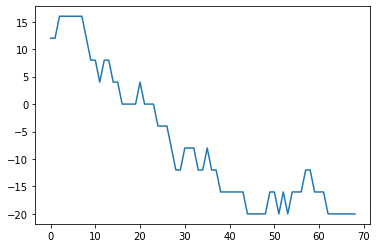

In [5]:
# Performing the MC step for all the N^2 spins:
# I wish to record how the energy drops. I will collect the energies and the spin configurations in between

## THIS IS A SINGLE MC CYCLE ##
E = []
for i in range(N):
    for j in range(N):
        
        del_E = energy.energy_update(lattice,J=1,flip=(i,j))
        if del_E < 0:
            lattice[i,j] = - lattice[i,j]
            E.append(energy.hamilton(lattice, J=1))
            #print((i,j))
        else :
            z = np.random.random(size= 1)
            if z < np.exp(-del_E/(k*T)) :
                lattice[i,j] = - lattice[i,j]
                E.append(energy.hamilton(lattice, J=1))
                #print((i,j))

plt.plot(E) # We can see that the energy of the system is indeed reducing - this means that the energy updates are correct

In [6]:
# Now we have to do this MC cycle on an initial 
# seed array of spins for about 10^4 times. 
# After that, we collect samples at each 10^2 
# We collect about 10^4 samples.
# interval of MC cycles

'''Issue with the code - T = 2.26 is the transition temp. 
However, even if I put T < 2.26 I dont get a neat ordered magnet.
I get a random distribution of spins (half in up, half in down state) '''

Temp = 4  # Transition temp should be 
# T~2.26 (putting k = 1 and J = 1)
k = 1

# Check if the numbers are good enough
t_eq = 10**3
t_a = 10**2
N = 10
n = 10**4

#### For these figures, it will roughly take us about 16 minutes to complete the storage of snapshots ####
# equilibriation takes around 30s #
#### How to improve this?        HOW TO?                                                                 ####

store_disk = False
snap = False
lattice = 2*np.random.randint(0,2,(N,N))-1
snapshots=[] # Better dataset to handle this?
T = t_eq + t_a*n # total time of simulation
for t in range(T):
    # 1 MC cycle
    for i in range(N):
        for j in range(N):
            # 1 MC Step
            del_E = energy.energy_update(lattice,J=1,flip=(i,j))
            if del_E < 0:
                lattice[i,j] = - lattice[i,j]
            else :
                z = np.random.random(size= 1)
                if z < np.exp(-del_E/(Temp)) :
                    lattice[i,j] = - lattice[i,j]
    if t>=t_eq:
        if t==t_eq: 
            print('Equilibrium has been reached')

            print(np.sum(lattice==1) - np.sum(lattice==-1))
            print(np.sum(lattice==-1))

            print(lattice)
            if not snap:
                break
        if snap & (t-t_eq)%t_a == 0 :
            # Here, calculate all the thermodynamic quantities and keep them adding 
            r = (t-t_eq)/t_a
            if r%1000 == 0: print("1000 samples collected")
            snapshots.append(lattice) # Collecting the lattice snapshot
            if store_disk:
                name = "t=" + str(r)+".csv"
                np.savetxt("snapshots/"+name, lattice, delimiter=' ')
    


Equilibrium has been reached
22
39
[[ 1  1  1  1  1  1  1 -1 -1  1]
 [ 1  1 -1  1  1  1  1 -1  1 -1]
 [ 1 -1 -1 -1 -1 -1  1  1  1 -1]
 [ 1 -1 -1 -1 -1  1 -1  1 -1  1]
 [ 1 -1  1 -1  1  1  1 -1 -1  1]
 [ 1  1  1 -1 -1  1 -1 -1 -1 -1]
 [ 1  1 -1 -1  1 -1 -1 -1 -1  1]
 [ 1  1 -1  1 -1  1  1  1  1  1]
 [ 1 -1  1 -1 -1  1  1  1  1  1]
 [ 1  1  1  1  1  1  1  1  1 -1]]


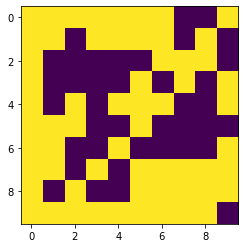

In [7]:
plt.imshow(lattice)


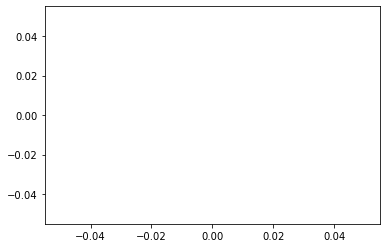

In [8]:
k = len(snapshots)

energies = []
for i in range(k):
    energies.append(energy.hamilton(snapshots[i],J=1))

plt.plot(energies)

In [9]:
"non equilibrium time evoltion as a markovian process like the random walk?" 
"How systems thermalise etx"

'How systems thermalise etx'

In [10]:
np.random.random(size= 1)

array([0.44311921])

In [11]:
# Next step - For each temperature, 
# (start from some low value) - obtain all the equilibrium snapshots,
# calculate magnetisation m , energy E, plot m as a function of Temp
# Then, calculate specific heat, susceptibility, magnetisation per unit spin (write functions for these)
# After this is done, then repeat the entire thing for different T and also size N

In [12]:
# Write a function for a single MC cycle

In [7]:
import os 
import thermodynamics as td
import numpy as np
import matplotlib.pyplot as plt

temp = np.arange(0.1,5.1, step = 0.1)
mag = [] # Ensemble-Averaged Magnetisation at each temperature
E = [] # Ensemble-Averaged Energy at each temperature

# Self task - can you do free energy vs magnetisation? 

below_Tc = 2.1 # If you get good results, try 2.2
above_Tc = 2.4 # If you get good results, try 2.3

mag_below = []
E_below = []
mag_above = []
E_above = []


fn = "snapshots\\N=5\\"  # You will have to do this calculation for N = [5,10,20,30]

# task - write down all the thermodynamic functions.
# Read through the entire generated data and store the essential td. functions/potentials
# Calc response functions from this stored data
### PART 3 DISTRIBUTION OF M vS E ###

# For plotting m - T transition
for t in temp:
    path = fn + "temp=" + str(round(t,1)) + "\\"
    m=0
    for i in range(1,10000):
        fname = path + "n="+str(round(float(i),1))+".csv"
        lattice = np.loadtxt(fname)
        lattice_mag = td.magnetisation(lattice)
        lattice_E = energy.hamilton(lattice, J=1)
        m += lattice_mag
        E += lattice_E
        if round(t,1) == below_Tc :
            mag_below.append(lattice_mag)
            E_below.append(lattice_E)
        elif round(t,1) == above_Tc :
            mag_above.append(lattice_mag)
            E_above.append(lattice_E)
    print("Done for t=",t)
    m /= 10000
    mag.append(m)
plt.plot(temp, np.array(mag))


Done for t= 0.1
Done for t= 0.2
Done for t= 0.30000000000000004
Done for t= 0.4
Done for t= 0.5
Done for t= 0.6
Done for t= 0.7000000000000001
Done for t= 0.8
Done for t= 0.9
Done for t= 1.0


KeyboardInterrupt: 

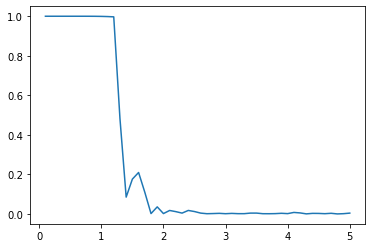

In [6]:
plt.plot(temp, np.abs(np.array(mag)))

# This drops off too soon. This is perhaps because of small size
# Tasks - produce larger sizes.

In [ ]:
# Equiblibrium distribution of m v/s E in histogram above and below Tc

## DO THIS PART ##

